# Analysis and Plotting

## Preliminaries

In [46]:
import os
import datetime
import json
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import toolz

In [2]:
sns.set_context('paper')

In [3]:
sns.set_style('whitegrid')

In [4]:
if 'get_ipython' in globals():
    get_ipython().run_line_magic('matplotlib', 'inline')
    from IPython.display import Image, HTML
else:
    HTML = lambda *a, **kw: None

In [5]:
from textrec.paths import paths
#from textrec import analysis_util, util, notebook_util
#reload(analysis_util), reload(util), reload(notebook_util), reload(automated_analyses)
from textrec.notebook_util import images, id2img, id2url, show_images

Loading COCO captions
Loading COCO id2url
Done


In [6]:
os.chdir(paths.top_level)

In [7]:
friendly_names = {
    'ideal_taps_per_word_corrected': "Taps per Typo-Corrected Word"
}

## Load results of writing experiment

Prerequisites: Run `make data/analyzed/combined_data.csv`.

In [11]:
experiments = ['gc1', 'spec2']

In [12]:
experiment_level_data = pd.read_csv(paths.analyzed / f'combined_experiments.csv')
block_level_data = pd.read_csv(paths.analyzed / f'combined_blocks.csv')
trial_level_data = pd.read_csv(paths.analyzed / f'combined_data.csv', dtype={'stimulus': str})
#trial_level_data = pd.read_csv(paths.analyzed / f'trial_{batch}.csv')
#helpful_ranks_by_condition = pd.read_csv(paths.analyzed / f'helpful_ranks_by_condition_{batch}.csv').set_index('index')

recs_trials = trial_level_data.query('condition != "norecs"')

In [8]:
from collections import Counter, defaultdict

In [9]:
from textrec.automated_analyses import nlp

Loading ONMT models...
coco_lm_adam_acc_46.00_ppl_16.32_e10_nooptim.pt
Loading model parameters.
coco_cap_adam_acc_48.73_ppl_12.56_e10_nooptim.pt
Loading model parameters.
Ready.
Loading SpaCy...done


In [10]:
import wordfreq

In [38]:
counts = defaultdict(Counter)
for idx, row in trial_level_data.loc[:,'experiment participant block idx idx_in_block condition corrected_text'.split()].iterrows():
    row2 = dict(row)
    for word in wordfreq.tokenize(row2.pop('corrected_text'), 'en'):
        counts[row2['condition']][word] += 1

In [39]:
{cond: len(count) for cond, count in counts.items()}

{'standard': 870, 'norecs': 927, 'gated': 715, 'contextual': 460}

In [40]:
all_words = sorted(tok for count in counts.values() for tok in count.keys())
word2idx = {word: idx for idx, word in enumerate(all_words)}
len(all_words)

2972

In [41]:
conds = sorted(counts.keys())
conds

['contextual', 'gated', 'norecs', 'standard']

In [69]:
counts_by_cond = np.zeros((len(conds), len(all_words)))
for cond, count in counts.items():
    cond_idx = conds.index(cond)
    for tok, n in count.items():
        assert n
#         assert tok != 'a'
        counts_by_cond[cond_idx, word2idx[tok]] = n

In [70]:
n

1

In [71]:
counts_by_cond[cond_idx, word2idx[tok]] = n

In [72]:
assert np.sum(total_counts == 0) == 0, np.sum(total_counts == 0)

AssertionError: 1539

In [43]:
total_counts = counts_by_cond.sum(axis=0)
[all_words[idx] for idx in np.argsort(total_counts)[-10:]]

['to', 'white', 'is', 'of', 'in', 'with', 'on', 'and', 'the', 'a']

In [44]:
fracs = counts_by_cond / total_counts

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [51]:
tok, n

('food', 1)

In [52]:
word2idx['food']

927

In [53]:
counts_by_cond[cond_idx, 927]

1.0

In [54]:
total_counts[927]

1.0

In [58]:
np.flatnonzero(total_counts == 0)

array([   0,    1,    2, ..., 2964, 2966, 2967])

In [61]:
counts['standard']['a']

1335

In [59]:
all_words[0]

'a'

In [16]:
import scipy.stats

In [10]:
trial_level_data[trial_level_data['corrected_text'].isnull()]

,experiment,participant,age,english_proficiency,gender,helpfulRank-accurate-least-condition,helpfulRank-accurate-least-idx,helpfulRank-accurate-most-condition,helpfulRank-accurate-most-idx,helpfulRank-quick-least-condition,...,corrected_idealrecuse_gated,corrected_bow_recs_offered_gated,corrected_bow_recs_idealuse_gated,corrected_tapstotype_cond,corrected_efficiency,ideal_taps_per_word_corrected,first_block_condition,chars_per_sec_norecs_mean,chars_per_sec_ratio_to_norecs,chars_per_sec_ratio_to_norecs_log


In [11]:
#experiment_level_data['NFC_quartile'] = np.floor(4 * experiment_level_data.NFC.rank(pct=True))

In [12]:
#trial_level_data['NFC_quartile_trial'] = np.floor(4*trial_level_data.NFC.rank(pct=True))

In [13]:
#t = pd.merge(experiment_level_data, trial_level_data, on='participant', how='right')
#t[t.NFC_quartile_trial != t.NFC_quartile].loc[:, ['participant', 'NFC_x', 'NFC_quartile_trial', 'NFC_quartile']]

In [14]:
for col in 'participant condition stimulus'.split():
    trial_level_data[col] = trial_level_data[col].astype('category')

In [15]:
def savefig(fn):
    plt.savefig(str(paths.figures / f'combined_{fn}.pdf'), metadata={'creationDate': None})

In [16]:
experiment_level_data.gender = experiment_level_data.gender.str.strip()

In [17]:
experiment_level_data.gender.value_counts(dropna=False)

male      80
female    58
NaN        3
Name: gender, dtype: int64

In [18]:
data = dict(
    num_participants=len(set(trial_level_data.participant)),
    non_male=(experiment_level_data.gender != 'male').sum().item(),
    num_trials_per=trial_level_data.groupby('participant').size().mean().item(),
    n_trials=len(trial_level_data))

In [19]:
data

{'num_participants': 141,
 'non_male': 61,
 'num_trials_per': 12.0,
 'n_trials': 1692}

In [20]:
for exp, group in experiment_level_data.groupby('experiment'):
    data.setdefault(exp, {})
    data[exp]['num_participants'] = len(group)
    helpfulness_columns = [col for col in experiment_level_data.columns if col.startswith('helpfulRank')]
    helpful_ranks = group[helpfulness_columns]
    helpful_ranks = helpful_ranks.rename(columns={col: col[len('helpfulRank-'):] for col in helpfulness_columns})

    helpful_ranks_by_condition = (
        helpful_ranks[[col for col in helpful_ranks.columns if col.endswith('condition')]]
        .apply(pd.value_counts)
        .fillna(0).astype(int))
    data[exp]['helpful_most_votes'] = (
        helpful_ranks_by_condition
        .loc[:,[col for col in helpful_ranks_by_condition.columns if 'most' in col]]
        .sum(axis=1).to_dict())
    data[exp]['helpful_least_votes'] = (
        helpful_ranks_by_condition
        .loc[:,[col for col in helpful_ranks_by_condition.columns if 'least' in col]]
        .sum(axis=1).to_dict())

In [21]:
data['gc1']

{'num_participants': 111,
 'helpful_most_votes': {'gated': 102, 'norecs': 21, 'standard': 210},
 'helpful_least_votes': {'gated': 38, 'norecs': 284, 'standard': 11}}

In [22]:
data['spec2']

{'num_participants': 30,
 'helpful_most_votes': {'contextual': 56, 'norecs': 3, 'standard': 30},
 'helpful_least_votes': {'contextual': 3, 'norecs': 83, 'standard': 4}}

In [23]:
helpfulness_columns = [col for col in experiment_level_data.columns if col.startswith('helpfulRank')]
helpful_ranks = experiment_level_data[['experiment'] + helpfulness_columns]
helpful_ranks = helpful_ranks.rename(columns={col: col[len('helpfulRank-'):] for col in helpfulness_columns})

helpful_ranks_by_condition = (
    helpful_ranks[['experiment']+[col for col in helpful_ranks.columns if col.endswith('condition')]]
    .groupby('experiment').apply(lambda group: group.apply(pd.value_counts))
    .fillna(0).astype(int))
# helpful_ranks_by_idx = (
#     helpful_ranks[[col for col in helpful_ranks.columns if col.endswith('idx')]]
#     .apply(pd.value_counts)
#     .fillna(0).astype(int))


In [24]:
HTML("Each of {num_participants} participants ({non_male} non-male) completed {num_trials_per} trials per experiment, for a total of {n_trials} trials.".format_map(data))

In [25]:
HTML("Participants spent {total_time_mean:.1f} +- {total_time_std:.1f} minutes total.".format(
    total_time_mean=experiment_level_data.total_time.mean(),
    total_time_std=experiment_level_data.total_time.std()))

In [26]:
data['used_predictive'] = {k.replace(' ', '_'): v for k, v in 
                                     experiment_level_data.use_predictive.value_counts().to_dict().items()}
data['verbalized_during'] = experiment_level_data.verbalized_during.value_counts().to_dict()
print('used_predictive', data['used_predictive'])

used_predictive {'Often': 64, 'Rarely': 47, 'Very_Rarely': 23, 'Almost_Always': 5, 'Never': 2}


In [27]:
HTML("""
Most participants reported (before beginning the study) that they used predictive typing on their phones:
""" + experiment_level_data.use_predictive.value_counts().to_frame("Used predictive typing?").to_html())

,Used predictive typing?
Often,64
Rarely,47
Very Rarely,23
Almost Always,5
Never,2


In [28]:
HTML("""
Several participants answered Yes to "While you were writing, did you speak or whisper what you were writing?":
""" + experiment_level_data.verbalized_during.value_counts().to_frame("Verbalized?").to_html())

,Verbalized?
No,115
Yes,26


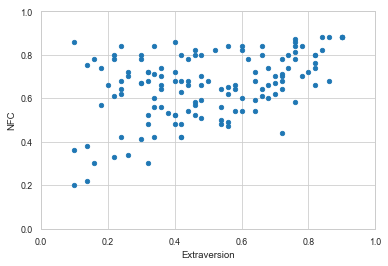

In [29]:
plt.close('all')
experiment_level_data.plot.scatter(x='Extraversion', y='NFC');
plt.xlim([0, 1])
plt.ylim([0, 1]);
savefig('trait_distribution')
HTML("""
We collected 10 items each for NFC and Extraversion.
We obtained a wider range of Extraversion than NFC.
(Min and max scales normalized to 0 and 1 respectively.)""")

In [30]:
def latexify_conds(txt):
    for cond in 'norecs standard contextual gated'.split():
        txt = txt.replace(cond, f'\\S{cond}')
    return txt

In [31]:
covc = experiment_level_data.groupby('experiment').condition_order.value_counts()
covc.name = 'Num participants'
covc = covc.to_latex()
covc = covc.replace(',', ', ')
covc = latexify_conds(covc)
print(covc)
data['condition_order_table'] = covc

\begin{tabular}{llr}
\toprule
      &                            &  Num participants \\
experiment & condition\_order &                   \\
\midrule
gc1 & \Sgated, \Sstandard, \Snorecs &                19 \\
      & \Sstandard, \Sgated, \Snorecs &                19 \\
      & \Sstandard, \Snorecs, \Sgated &                19 \\
      & \Sgated, \Snorecs, \Sstandard &                18 \\
      & \Snorecs, \Sgated, \Sstandard &                18 \\
      & \Snorecs, \Sstandard, \Sgated &                18 \\
spec2 & \Scontextual, \Snorecs, \Sstandard &                 5 \\
      & \Scontextual, \Sstandard, \Snorecs &                 5 \\
      & \Snorecs, \Scontextual, \Sstandard &                 5 \\
      & \Snorecs, \Sstandard, \Scontextual &                 5 \\
      & \Sstandard, \Scontextual, \Snorecs &                 5 \\
      & \Sstandard, \Snorecs, \Scontextual &                 5 \\
\bottomrule
\end{tabular}



In [32]:
experiment_level_data.groupby('experiment').condition_order.value_counts().to_frame()

condition_order
experiment condition_order                            
gc1        gated,standard,norecs                    19
           standard,gated,norecs                    19
           standard,norecs,gated                    19
           gated,norecs,standard                    18
           norecs,gated,standard                    18
           norecs,standard,gated                    18
spec2      contextual,norecs,standard                5
           contextual,standard,norecs                5
           norecs,contextual,standard                5
           norecs,standard,contextual                5
           standard,contextual,norecs                5
           standard,norecs,contextual                5

In [33]:
def summarize_means(df, by, outcome):
    means = df.groupby(by)[outcome].mean()
    data[f'{outcome}_means'] = means.to_dict()
    for exp, group in df.groupby('experiment'):
        data[exp][f'{outcome}_means'] = group.groupby(by)[outcome].mean().to_dict()
    return ', '.join(f'{name}={group_mean:.2f}' for name, group_mean in means.iteritems())

In [34]:
def analyze_outcome(df, by, outcome):
    plt.close('all')
    sns.barplot(x=by, y=outcome, data=df, capsize=.2)
    plt.ylabel(friendly_names.get(outcome, outcome))
    savefig(outcome)
    return summarize_means(df, by, outcome)

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'contextual=8.97, gated=10.32, norecs=15.12, standard=9.33'

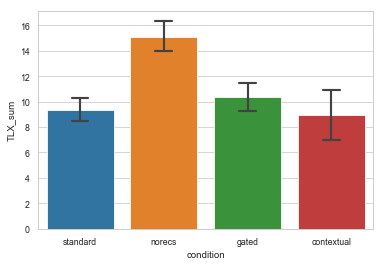

In [35]:
analyze_outcome(block_level_data, 'condition', 'TLX_sum')

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


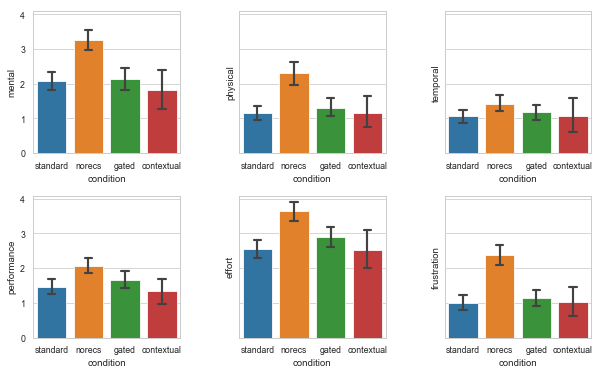

In [36]:
plt.close('all')
tlxen = 'mental physical temporal performance effort frustration'.split()
fig, axs = plt.subplots(2, 3, figsize=(10,6), sharey=True)
plt.subplots_adjust(wspace=.4, hspace=.3)
for i, facet in enumerate(tlxen):
    ax = axs.ravel()[i]
    sns.barplot(x='condition', y=facet, data=block_level_data, capsize=.2, ax=ax)
savefig('tlx_parts')

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'contextual=72.41, gated=67.05, norecs=73.48, standard=68.80'

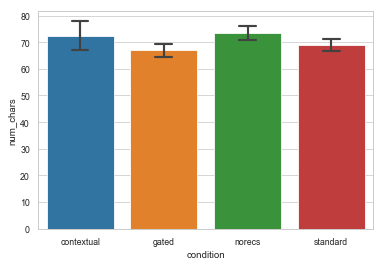

In [37]:
analyze_outcome(trial_level_data, 'condition', 'num_chars')

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'contextual=14.51, gated=13.19, norecs=14.49, standard=13.69'

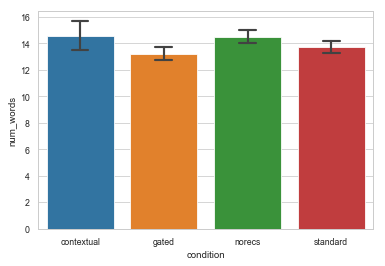

In [38]:
analyze_outcome(trial_level_data, 'condition', 'num_words')

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'contextual=0.11, gated=0.13, norecs=0.21, standard=0.12'

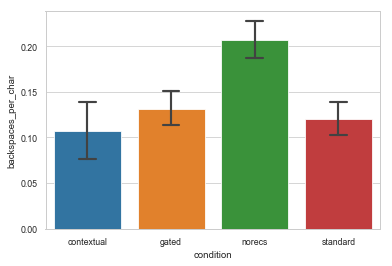

In [39]:
analyze_outcome(trial_level_data, 'condition', 'backspaces_per_char')

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'contextual=0.00, gated=0.00, norecs=0.00, standard=0.00'

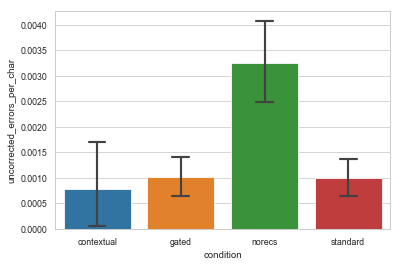

In [40]:
analyze_outcome(trial_level_data, 'condition', 'uncorrected_errors_per_char')

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'contextual=7.43, gated=8.72, norecs=15.17, standard=8.46'

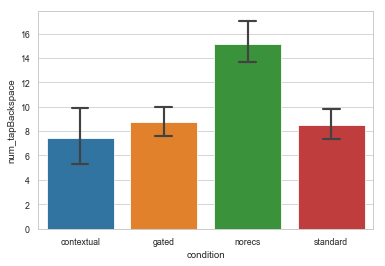

In [41]:
analyze_outcome(trial_level_data, 'condition', 'num_tapBackspace')

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'contextual=2.17, gated=2.00, norecs=1.98, standard=2.11'

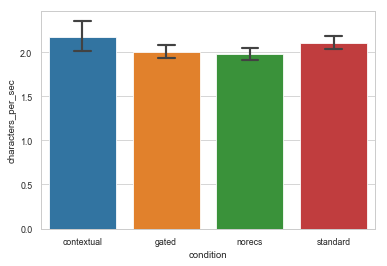

In [42]:
analyze_outcome(trial_level_data, 'condition', 'characters_per_sec')

In [43]:
#analyze_outcome(recs_trials, 'condition', 'rec_use_full_frac')

In [44]:
#analyze_outcome(trial_level_data, 'condition', 'extraneous_inputs_per_char')

In [45]:
#analyze_outcome(recs_trials, 'condition', 'rec_use_frac')

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


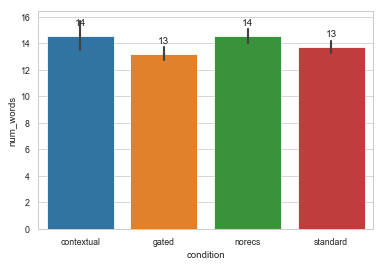

In [70]:
axs = sns.barplot(data=trial_level_data, x='condition', y='num_words')
for rect in list(axs.findobj(mpl.patches.Rectangle))[:-1]:
    height = rect.get_height()
    axs.text(rect.get_x() + rect.get_width()/2., 1.05*height,
            '%d' % int(height),
            ha='center', va='bottom')

In [68]:
sns.barplot??

In [69]:
rect.get_height()

1.0

In [62]:
import matplotlib as mpl

In [60]:
axs.get_children()

 Text(0.5,1,''),
 Text(0,1,''),
 Text(1,1,''),

0.7766831586684526

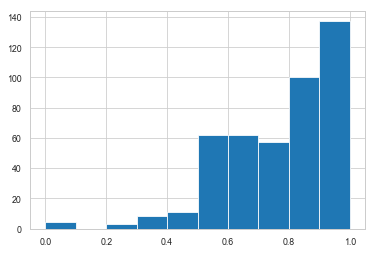

In [46]:
condition = 'gated'
trials = trial_level_data[trial_level_data.condition == condition]
useful_if_shown = (trials.orig_bow_recs_idealuse_cond / trials.orig_bow_recs_offered_cond)
useful_if_shown.hist()
useful_if_shown.mean()

0.6175835187655359

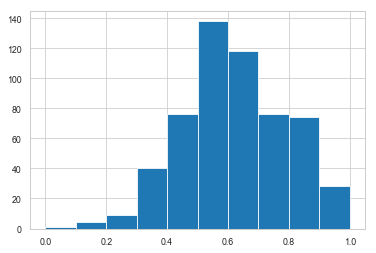

In [47]:
condition = 'standard'
trials = trial_level_data[trial_level_data.condition == condition]
useful_if_shown = (trials.orig_bow_recs_idealuse_cond / trials.orig_bow_recs_offered_cond)
useful_if_shown.hist()
useful_if_shown.mean()

In [48]:
weird_ttts = trial_level_data[trial_level_data.orig_tapstotype_cond > trial_level_data.num_taps]
if len(weird_ttts) > 0:
    print("SOME WEIRD TapsToType")
    print(weird_ttts.loc[:,['participant', 'stimulus', 'text', 'condition', 'num_taps', 'orig_tapstotype_cond']])

In [49]:
print('\n\n'.join(x for x in experiment_level_data['techDiff'] if isinstance(x,str)))

None

No

No

No

No

Nope

No

No

None

None

No

No

No

No

No

No

None

No

None

No

No

No

No

No

Na

No.

No

No

No

No. 

None

No

No

No

None

No

No difficulties 

No.

no

No. 

No

No

No

No

None

No

No

No

No

No

No

No

No

No

No

No

No

No

No

None.

Nope

No

Nope

No

No

No

No

No

No

No

Nope

No

No

None

Nope

No.

No

None

No

No

No

No

No

No.

No

N

No

No

No

No

Everything was perfect.

No

No

No

No

No

No difficulties at all

No

No

No

Nope

No

No

No

No

No

No

No


In [50]:
print('\n\n'.join(x for x in experiment_level_data['other'] if isinstance(x, str)))

I think everything went well and the survey had no problems 

It went well but the second keyboard was frustrating. The lack of ability to edit errors was annoying 

The experiment was easy to understand

It went fine. Not too bad. 

I thought it was better than most

It was an interesting survey due to its uniqueness. 

I wish it worked better in landscape mode, since I find it easier to type that way

It went well

The experiment seemed to go pretty well, tough I did notice I ended up having some typos I didn't fix. I guess  I just accidentally overlooked them at the time, I apologize. I tried to be as accurate as possible.

Thanks!

I enjoyed the experiment! Nice change up from normal mturk studies. Appreciate you allowing me to participate.

Enjoyed it.I wish I didn't have to do it in portrait mode - I am very slow that way.

It was okay, as long as you got the data you were looking for. I hope my answers were acceptable. Thank you for letting me participate. 

Great experiment! I 

/Users/kcarnold/anaconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


'contextual=1.62, gated=1.74, norecs=1.78, standard=1.63'

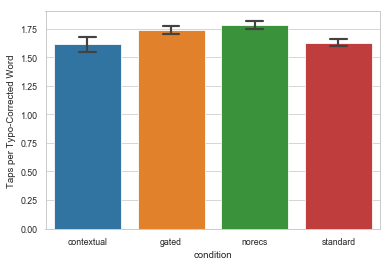

In [51]:
analyze_outcome(trial_level_data, 'condition', 'ideal_taps_per_word_corrected')

In [56]:
data['spec2']

{'num_participants': 30,
 'helpful_most_votes': {'contextual': 56, 'norecs': 3, 'standard': 30},
 'helpful_least_votes': {'contextual': 3, 'norecs': 83, 'standard': 4},
 'TLX_sum_means': {'contextual': 8.966666666666667,
  'norecs': 15.633333333333333,
  'standard': 9.5},
 'num_chars_means': {'contextual': 72.40833333333333,
  'gated': nan,
  'norecs': 74.9,
  'standard': 68.10833333333333},
 'num_words_means': {'contextual': 14.508333333333333,
  'gated': nan,
  'norecs': 14.783333333333333,
  'standard': 13.65},
 'backspaces_per_char_means': {'contextual': 0.10692661006015898,
  'gated': nan,
  'norecs': 0.21856551252447962,
  'standard': 0.0970735680906057},
 'uncorrected_errors_per_char_means': {'contextual': 0.0007803126824865955,
  'gated': nan,
  'norecs': 0.0025008254921587156,
  'standard': 0.0008869500618562064},
 'num_tapBackspace_means': {'contextual': 7.433333333333334,
  'gated': nan,
  'norecs': 16.458333333333332,
  'standard': 6.475},
 'characters_per_sec_means': {'con

In [52]:
import yaml

In [53]:
data_fname = paths.analyzed / 'data.yaml'
with open(data_fname, 'w') as f:
    yaml.safe_dump(data, f)

In [54]:
assert False

AssertionError: 

In [13]:
import tqdm

In [44]:
gc1 = trial_level_data[trial_level_data.experiment == 'gc1'].copy()

In [15]:
all_docs = [nlp(text) for text in tqdm.tqdm_notebook(gc1.corrected_text)]

In [23]:
by_pos = defaultdict(Counter)
for doc in all_docs:
    for token in doc:
        by_pos[token.pos_][token.text.lower()] += 1

In [24]:
by_pos.keys()

dict_keys(['DET', 'ADJ', 'PUNCT', 'CCONJ', 'NOUN', 'ADP', 'VERB', 'PART', 'ADV', 'PRON', 'NUM', 'X', 'PROPN', 'SYM'])

In [29]:
print(' '.join(by_pos['ADJ'].keys()))

black white tan colored grey brown many professional tall red blue dirty public yellow newlywed windy old colorful large historic far long haired other small silver mac blond male pink double quaint outdoor clean gray striped young multiple narrow about blonde wooden top tricolored thick left ready picturesque blurry big obfuscated generic fashioned mid past new beige multi - light empty clear busy opposing full turquoise open few unwrapped orange foggy nice neat medium sized wet green minimalistic different cathedral right fancy crowded basic unopened classic older looking caucasian scenic european most opaque visible various stainless more bent venetian workplace bright uniform several frosted sliding accessible extra perfect next hard organized handed closed surfer opposite sandy plain high first medieval numerous pale ornate half married chested unfocused dingy colourful incoming turf dark multicolored bewildered solitary dreary immaculate reminiscent sunny cerulean explosive frost

In [30]:
colors = "black white tan grey brown red blue yellow silver blond pink gray blonde beige turquoise orange green teal bluish greenish olive yellowy brownish burgundy blackish aquamarine".split()

In [31]:
import re

In [36]:
color_regex = re.compile(r'\b({})\b'.format('|'.join(colors)))

In [45]:
gc1['has_color'] = [bool(color_regex.search(text)) for text in gc1.corrected_text]

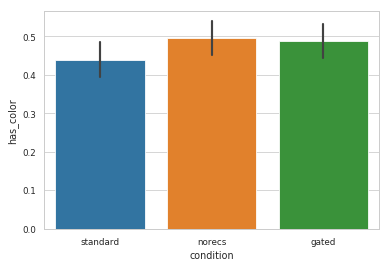

In [47]:
sns.barplot(x='condition', y='has_color', data=gc1)

In [12]:
from textrec import onmt_model_2

In [13]:
def get_recs_cap(cocoid, context, prefix=None):
    return onmt_model_2.get_recs('coco_cap', str(cocoid), context, prefix=prefix)

def get_recs_lm(cocoid, context, prefix=None):
    return onmt_model_2.get_recs('coco_lm', '.', context, prefix=prefix)

In [49]:
discreps = []
for idx in range(10):
    stimulus = trial_level_data.stimulus.iloc[idx]
    text = trial_level_data.text.iloc[idx]
    text_without_punct = text.replace('.', '').replace(',', '')
    tokens = text_without_punct.split()
    print(idx, text_without_punct)
    for condition in ['contextual', 'standard']:
        get_recs = get_recs_lm if condition == 'standard' else get_recs_cap
        for i in range(len(tokens) - 1):
            context = tokens[:i]
            next_word = tokens[i]
            after_next_word = tokens[i + 1]
            recs = [word for word, prob in get_recs_cap(stimulus, context)]
            if after_next_word in recs:
                discreps.append(dict(
                    stimulus=stimulus, text=text,
                    word_idx=i,
                    context_word=context[-1] if i > 0 else "",
                    skipped_word=next_word,
                    skipped_to=after_next_word,
                    next_word_also_reced=next_word in recs
                ))


0 a black white and tan colored bird perches on a branch and looks to its left
1 a baseball player wearing a black shirt and grey pants swings at a baseball pitch with his bat
2 a brown computer desk and shelf containing a pc laptop and many desk items
3 a surfer rides a wave while wearing a white shirt and black pants
4 a professional tennis player runs to backhand a tennis serve
5 a city street with tall buildings people and a very tall red bus
6 a brown train at a train station with white and blue walls
7 people enjoying the beach and flying kites
8 a newly wed couple cutting the wedding cake in black and white
9 a bathroom featuring a white sink and toilet


In [50]:
pd.DataFrame(discreps)

AttributeError: 'LazyConfigValue' object has no attribute 'lower'

   context_word  next_word_also_reced skipped_to  skipped_word stimulus  \
0         black                 False        and         white   280480   
1           tan                 False       bird       colored   280480   
2         black                 False        and         white   280480   
3           tan                 False       bird       colored   280480   
4                                True   baseball             a   236272   
5         black                 False        and         shirt   236272   
6        swings                  True          a            at   236272   
7             a                  True      pitch      baseball   236272   
8                                True   baseball             a   236272   
9         black                 False        and         shirt   236272   
10       swings                  True          a            at   236272   
11            a                  True      pitch      baseball   236272   
12            a          

In [16]:
get_recs_lm(None, "a black".split())

[('and', -0.5987324714660645),
 ('cat', -1.9580035209655762),
 ('dog', -2.32011079788208)]

In [18]:
onmt_model_2.tokenize(trial_level_data.text.iloc[1])

['a',
 'baseball',
 'player',
 'wearing',
 'a',
 'black',
 'shirt',
 'and',
 'grey',
 'pants',
 ',',
 'swings',
 'at',
 'a',
 'baseball',
 'pitch',
 'with',
 'his',
 'bat']

In [ ]:
num_details = pd.read_csv(paths.data / 'num_details_spec1.csv').rename(columns={
    'image_id': 'stimulus',
    'text': 'corrected_text'
})

In [ ]:
with_num_details = pd.merge(
    trial_level_data,
    num_details,
    on=('stimulus', 'corrected_text'),
#     right_on=('image_id', 'text'),
    how='outer')

In [ ]:
with_num_details

In [ ]:
sns.barplot(x='condition', y='num_details', data=with_num_details, capsize=.2)

In [ ]:
with_num_details.num_details.describe()

In [ ]:
print('\n'.join(with_num_details.sort_values('num_details').text.iloc[-5:]))

In [ ]:
with_num_details.to_csv('with_num_details.csv')

Bonus the most specific captions for each image. Some participants wrote the most specific captions for several images, so they get mulitple bonuses.

In [ ]:
with_num_details.sort_values('num_details', ascending=False).drop_duplicates(['stimulus']).loc[:,['participant', 'corrected_text', 'num_details']].groupby('participant').size() * 0.50

In [ ]:
from textrec import onmt_model_2

In [ ]:
get_recs_cap(71815, 'a'.split(), prefix='t')

In [ ]:
from functools import partial

In [ ]:
txt = "a tennis player swinging at a ball"
txt[:0].rsplit(' ', 1)

In [ ]:
txt.rindex(' ')

In [ ]:
def taps_to_type(rec_gen, txt):
    actions = []
    # Invariant: performing [actions] types txt[:idx]
    idx = 0
    while idx < len(txt):
        sofar = txt[:idx]
        if ' ' in sofar:
            last_space_idx = sofar.rindex(' ')
        else:
            last_space_idx = -1
        prefix = sofar[:last_space_idx + 1]
        cur_word = sofar[last_space_idx + 1:]
        cur_desired_word = txt[last_space_idx + 1:].split(' ', 1)[0]
#         if cur_desired_word[-1] in ',.;-':
#             cur_desired_word = cur_desired_word[:-1]
#         print(repr(prefix), repr(cur_word), repr(cur_desired_word))
        recs = rec_gen(onmt_model_2.tokenize(prefix), prefix=cur_word)
        words = [word for word, rec in recs]
        print(prefix, words)
        if cur_desired_word in words:
            actions.append(dict(type='rec', which=words.index(cur_desired_word), word=cur_desired_word))
            idx = last_space_idx + 1 + len(cur_desired_word) + 1
        else:
            actions.append(dict(type='key', key=txt[idx]))
            idx += 1
        print(actions[-1])
    return actions
taps_to_type(partial(get_recs_cap, 71815), "a young man wearing a red shirt and holding a white and red tennis racket")

In [ ]:
if False:
    writer = pd.ExcelWriter('specificity_details.xlsx')
    for stim, group in trial_level_data.groupby('stimulus'):
        group.loc[:,['corrected_text']].to_excel(writer, str(stim))
    writer.close()

In [ ]:
if False:
    for stim, txts in trial_level_data.groupby('stimulus').text:
        print()
        print(stim)
        print('\n'.join(txts))
        txts.to_csv(f'{stim}.csv', index=False)

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("brms")


In [ ]:
%%R
library(ARTool)

In [ ]:
trial_level_filtered = trial_level_data.loc[:, 'participant block condition stimulus ideal_taps_per_word_corrected'.split()]

In [ ]:
%Rpush trial_level_filtered

In [ ]:
%%R
summary(trial_level_filtered)

In [ ]:
%%R
transformed <- art(ideal_taps_per_word_corrected ~ condition + (1|participant) + (1|stimulus), data=trial_level_filtered)

In [ ]:
%%R
summary(transformed)

In [ ]:
%%R
anova(transformed)